#### Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.path as mpath
import xarray as xr
import matplotlib.cm as cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.gridliner as gridliner
import matplotlib.ticker as mticker
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings("ignore", message="All-NaN slice encountered")

# Esemble 1001-001 -Ice thickness

### Labrador Coast Domain

In [7]:
path='/Users/thomas/Documents/Data'
ds=xr.open_mfdataset(path+'/icethick-esemble 1001-001/*.nc')

In [8]:
dss=xr.open_mfdataset(path+'/esemble 1001-001/*.nc')

In [9]:
hi=ds['hi']
aice=dss['aice']

In [10]:
lon_min, lon_max =292, 315 #68W & 45W
lat_min, lat_max =51,67

mask = ((hi.TLAT >= lat_min) & (hi.TLAT <= lat_max) &
        (hi.TLON >= lon_min) & (hi.TLON <= lon_max))

mask1 = ((aice.TLAT >= lat_min) & (aice.TLAT <= lat_max) &
        (aice.TLON >= lon_min) & (aice.TLON <= lon_max))

hi_region =hi.where(mask, drop=True)
aice__region =aice.where(mask1, drop=True)

In [13]:
sic_greater_15 = aice__region >= 0.15
hi_region=hi_region.where(sic_greater_15)

In [14]:
hi_1850_59 = hi_region.sel(time=slice('1850-01-01', '1859-12-31'))
hi_1860_69 = hi_region.sel(time=slice('1860-01-01', '1869-12-31'))
hi_1870_79 = hi_region.sel(time=slice('1870-01-01', '1879-12-31'))
hi_1880_89 = hi_region.sel(time=slice('1880-01-01', '1889-12-31'))
hi_1890_99 = hi_region.sel(time=slice('1890-01-01', '1899-12-31'))
hi_1900_09 = hi_region.sel(time=slice('1900-01-01', '1909-12-31'))
hi_1910_19 = hi_region.sel(time=slice('1910-01-01', '1919-12-31'))
hi_1920_29 = hi_region.sel(time=slice('1920-01-01', '1929-12-31'))
hi_1930_39 = hi_region.sel(time=slice('1930-01-01', '1939-12-31'))
hi_1940_49 = hi_region.sel(time=slice('1940-01-01', '1949-12-31'))
hi_1950_59 = hi_region.sel(time=slice('1950-01-01', '1959-12-31'))
hi_1960_69 = hi_region.sel(time=slice('1960-01-01', '1969-12-31'))
hi_1970_79 = hi_region.sel(time=slice('1970-01-01', '1979-12-31'))
hi_1980_89 = hi_region.sel(time=slice('1980-01-01', '1989-12-31'))
hi_1990_99 = hi_region.sel(time=slice('1990-01-01', '1999-12-31'))
hi_2000_09 = hi_region.sel(time=slice('2000-01-01', '2009-12-31'))
hi_2010_19 = hi_region.sel(time=slice('2010-01-01', '2019-12-31'))

hi_2020_29 = hi_region.sel(time=slice('2020-01-01', '2029-12-31'))
hi_2030_39 = hi_region.sel(time=slice('2030-01-01', '2039-12-31'))
hi_2040_49 = hi_region.sel(time=slice('2040-01-01', '2049-12-31'))
hi_2050_59 = hi_region.sel(time=slice('2050-01-01', '2059-12-31'))
hi_2060_69 = hi_region.sel(time=slice('2060-01-01', '2069-12-31'))
hi_2070_79 = hi_region.sel(time=slice('2070-01-01', '2079-12-31'))
hi_2080_89 = hi_region.sel(time=slice('2080-01-01', '2089-12-31'))
hi_2090_100 = hi_region.sel(time=slice('2090-01-01', '2100-12-31'))

In [15]:
# Monthly mean hist
hi_1850_59_monthly = hi_1850_59.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1860_69_monthly = hi_1860_69.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1870_79_monthly = hi_1870_79.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1880_89_monthly = hi_1880_89.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1890_99_monthly = hi_1890_99.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1900_09_monthly = hi_1900_09.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1910_19_monthly = hi_1910_19.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1920_29_monthly = hi_1920_29.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1930_39_monthly = hi_1930_39.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1940_49_monthly = hi_1940_49.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1950_59_monthly = hi_1950_59.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1960_69_monthly = hi_1960_69.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1970_79_monthly = hi_1970_79.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1980_89_monthly = hi_1980_89.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1990_99_monthly = hi_1990_99.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_2000_09_monthly = hi_2000_09.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_2010_19_monthly = hi_2010_19.groupby('time.month').mean('time').mean(('nj', 'ni'))

# Monthly mean future
hi_2020_29_monthly = hi_2020_29.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_2030_39_monthly = hi_2030_39.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_2040_49_monthly = hi_2040_49.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_2050_59_monthly = hi_2050_59.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_2060_69_monthly = hi_2060_69.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_2070_79_monthly = hi_2070_79.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_2080_89_monthly = hi_2080_89.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_2090_100_monthly = hi_2090_100.groupby('time.month').mean('time').mean(('nj', 'ni'))

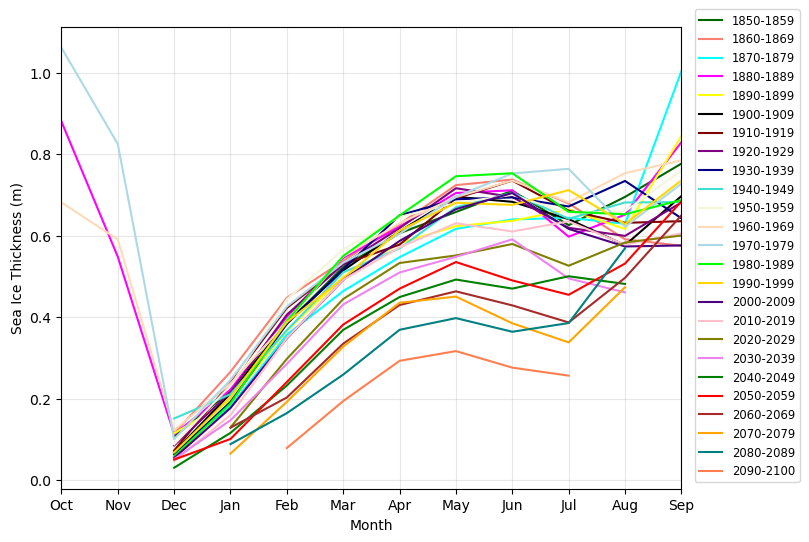

In [16]:
# Set xticks to represent months from January to December
fig,ax=plt.subplots(figsize=(8,6))
all_data = [hi_1850_59_monthly, hi_1860_69_monthly, hi_1870_79_monthly, hi_1880_89_monthly, hi_1890_99_monthly,
            hi_1900_09_monthly, hi_1910_19_monthly, hi_1920_29_monthly, hi_1930_39_monthly, hi_1940_49_monthly,
            hi_1950_59_monthly, hi_1960_69_monthly, hi_1970_79_monthly, hi_1980_89_monthly, hi_1990_99_monthly,
            hi_2000_09_monthly, hi_2010_19_monthly, hi_2020_29_monthly, hi_2030_39_monthly, hi_2040_49_monthly,
            hi_2050_59_monthly, hi_2060_69_monthly, hi_2070_79_monthly, hi_2080_89_monthly, hi_2090_100_monthly]


labels = ['1850-1859', '1860-1869', '1870-1879', '1880-1889', '1890-1899', '1900-1909', '1910-1919',
          '1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989',
          '1990-1999', '2000-2009', '2010-2019', '2020-2029', '2030-2039', '2040-2049', '2050-2059',
          '2060-2069', '2070-2079', '2080-2089', '2090-2100']

colors = ['darkgreen', 'salmon', 'cyan', 'magenta', 'yellow', 'black', 'maroon', 
          'purple',  'navy', 'turquoise','beige', 'peachpuff', 'lightblue', 'lime', 'gold',
          'indigo', 'pink', 'olive','violet', 'green', 'red',  'brown',
          'orange', 'teal', 'coral']

for i in range(len(all_data)):
    linestyle = '-'  # Default linestyle
    ax.plot((np.append(all_data[i][9:],all_data[i][:9])), color=colors[i], linestyle=linestyle,
             label=labels[i])

plt.xticks(np.arange(0,12), ['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
                             'Sep',])
plt.xlabel('Month')
plt.ylabel('Sea Ice Thickness (m)')
#plt.title('Seasonal Cycle of Sea Ice Thickness\n(EM 1001-001)', fontweight='bold')
plt.grid(alpha=0.3)
plt.xlim(0, 11)
plt.legend(loc='best',fontsize='small',bbox_to_anchor=(1.2, 1.05))
plt.savefig(path+'/plots/'+'plot5.jpg',dpi=300, bbox_inches='tight')
plt.show()

#panarctic 

In [57]:
 hi_region[2::12]

<xarray.DataArray 'hi' (time: 251, nj: 44, ni: 30)>
dask.array<getitem, shape=(251, 44, 30), dtype=float32, chunksize=(10, 44, 30), chunktype=numpy.ndarray>
Coordinates:
    TLON     (nj, ni) float32 dask.array<chunksize=(44, 30), meta=np.ndarray>
    TLAT     (nj, ni) float32 dask.array<chunksize=(44, 30), meta=np.ndarray>
    ULON     (nj, ni) float32 dask.array<chunksize=(44, 30), meta=np.ndarray>
    ULAT     (nj, ni) float32 dask.array<chunksize=(44, 30), meta=np.ndarray>
  * time     (time) object 1850-04-01 00:00:00 ... 2100-04-01 00:00:00
Dimensions without coordinates: nj, ni
Attributes:
    units:          m
    long_name:      grid cell mean ice thickness
    cell_measures:  area: tarea
    cell_methods:   time: mean
    time_rep:       averaged

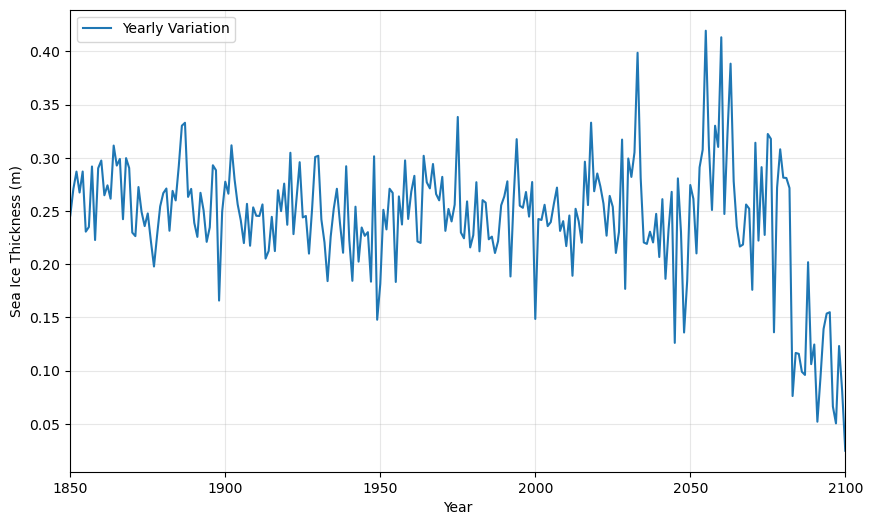

In [58]:
fig, ax=plt.subplots(figsize=(10,6))
# Compute the yearly mean ice area
yearly_mean = hi_region[2::12].mean(('nj', 'ni'))

# Calculate the mean across all years
#overall_mean = yearly_mean.mean('year')
# Create an array with the same size as the number of years with the overall mean value
#mean_line = np.full_like(yearly_mean, overall_mean)
# Plot the yearly variations and the mean line
ax.plot(np.arange(1850,2101), yearly_mean, label='Yearly Variation')
#plt.plot(yearly_mean.year, mean_line, label='Mean Variation', linestyle='--')
#ax.plot(yearly_mean.year, yearly_mean.rolling(year=10, center=True).mean(), label='Smoothed Yearly Variation')
#rect=ax.add_patch(Rectangle((2048, 0.028), 20, 0.044, edgecolor='red',facecolor='none',lw=2))
#rect.set_zorder(10)
#ax.set_title('Yearly Mean Sea Ice Thickness\n(EM 1001-001)', fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Sea Ice Thickness (m)')
plt.grid(alpha=0.3)
plt.xlim(1850,2100)
plt.legend()
plt.savefig(path+'/plots/'+'plot6.jpg',dpi=300, bbox_inches='tight')
plt.show()

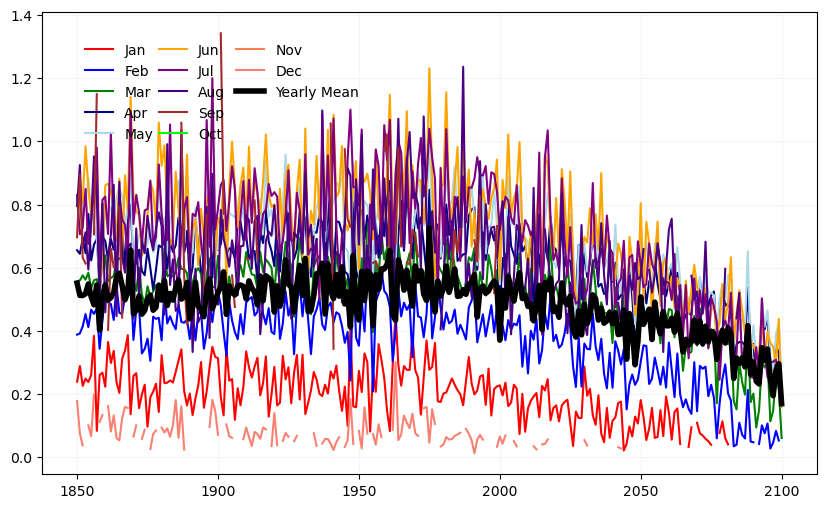

In [17]:
fig, ax=plt.subplots(figsize=(10,6))
# Compute the yearly mean ice thickness
# yearly_mean = hi_region.groupby('time.year').mean('time')
yearly_mean = hi_region.groupby('time.year').mean('time').mean(('nj', 'ni'))
jan_data = hi_region[11::12].mean(('nj', 'ni'))
feb_data = hi_region[0::12].mean(('nj', 'ni'))
mar_data = hi_region[1::12].mean(('nj', 'ni'))
apr_data = hi_region[2::12].mean(('nj', 'ni'))
may_data = hi_region[3::12].mean(('nj', 'ni'))
jun_data = hi_region[4::12].mean(('nj', 'ni'))
jul_data = hi_region[5::12].mean(('nj', 'ni'))
aug_data = hi_region[6::12].mean(('nj', 'ni'))
sep_data = hi_region[7::12].mean(('nj', 'ni'))
oct_data = hi_region[8::12].mean(('nj', 'ni'))
nov_data = hi_region[9::12].mean(('nj', 'ni'))
dec_data = hi_region[10::12].mean(('nj', 'ni'))

# Calculate the mean across all years
#overall_mean = yearly_mean.mean('year')
#print(overall_mean)
# Create an array with the same size as the number of years with the overall mean value
#mean_line = np.full_like(yearly_mean, overall_mean)
# Plot the yearly variations and the mean line

ax.plot(np.arange(1850,2101), jan_data, label='Jan', color='red')
ax.plot(np.arange(1850,2101), feb_data, label='Feb', color='blue')
ax.plot(np.arange(1850,2101), mar_data, label='Mar', color='green')
ax.plot(np.arange(1850,2101), apr_data, label='Apr', color='navy')
ax.plot(np.arange(1850,2101), may_data, label='May', color='lightblue')
ax.plot(np.arange(1850,2101), jun_data, label='Jun', color='orange')
ax.plot(np.arange(1850,2101), jul_data, label='Jul', color='purple')
ax.plot(np.arange(1850,2101), aug_data, label='Aug', color='indigo')
ax.plot(np.arange(1850,2101), sep_data, label='Sep', color='brown')
ax.plot(np.arange(1850,2101), oct_data, label='Oct', color='lime')
ax.plot(np.arange(1850,2101), nov_data, label='Nov', color='coral')
ax.plot(np.arange(1850,2101), dec_data, label='Dec', color='Salmon')
ax.plot(np.arange(1850,2102), yearly_mean, label='Yearly Mean', color='black', linewidth=4)
#rect=ax.add_patch(Rectangle((1850, 70), 100, 25, edgecolor='k',facecolor='none',alpha=0.11,lw=1, ))
#rect.set_zorder(10)
#plt.xticks(np.arange(1850,2100))
plt.grid(alpha=0.1)
handles, labels = plt.gca().get_legend_handles_labels()

# Create two legends
legend1=plt.legend(handles[:5],labels[:5],loc='upper left',bbox_to_anchor=(0.04, 0.96),frameon=False)
legend2=plt.legend(handles[5:10],labels[5:10],loc='upper left',bbox_to_anchor=(0.135, 0.96),frameon=False)
legend3=plt.legend(handles[10:],labels[10:],loc='upper left',bbox_to_anchor=(0.235, 0.96),frameon=False)


# Add the first legend manually to the current Axes
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

#plt.savefig('year-area1.jpg',dpi=300, bbox_inches='tight')
plt.show()

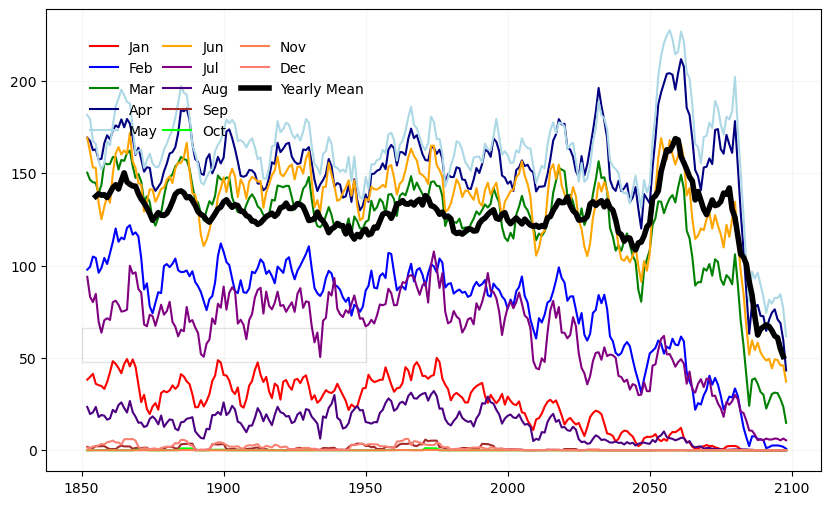

In [18]:
fig, ax=plt.subplots(figsize=(10,6))
# Compute the yearly mean ice thickness
# yearly_mean = hi_region.groupby('time.year').mean('time')
yearly_mean = hi_region.groupby('time.year').mean('time').sum(('nj', 'ni'))
jan_data = hi_region[11::12].sum(('nj', 'ni'))
feb_data = hi_region[0::12].sum(('nj', 'ni'))
mar_data = hi_region[1::12].sum(('nj', 'ni'))
apr_data = hi_region[2::12].sum(('nj', 'ni'))
may_data = hi_region[3::12].sum(('nj', 'ni'))
jun_data = hi_region[4::12].sum(('nj', 'ni'))
jul_data = hi_region[5::12].sum(('nj', 'ni'))
aug_data = hi_region[6::12].sum(('nj', 'ni'))
sep_data = hi_region[7::12].sum(('nj', 'ni'))
oct_data = hi_region[8::12].sum(('nj', 'ni'))
nov_data = hi_region[9::12].sum(('nj', 'ni'))
dec_data = hi_region[10::12].sum(('nj', 'ni'))


# Calculate the mean across all years
#overall_mean = yearly_mean.mean('year')
#print(overall_mean)
# Create an array with the same size as the number of years with the overall mean value
#mean_line = np.full_like(yearly_mean, overall_mean)
# Plot the yearly variations and the mean line


ax.plot(np.arange(1850,2101), jan_data.rolling(time=5, center=True).mean(), label='Jan', color='red')
ax.plot(np.arange(1850,2101), feb_data.rolling(time=5, center=True).mean(), label='Feb', color='blue')
ax.plot(np.arange(1850,2101), mar_data.rolling(time=5, center=True).mean(), label='Mar', color='green')
ax.plot(np.arange(1850,2101), apr_data.rolling(time=5, center=True).mean(), label='Apr', color='navy')
ax.plot(np.arange(1850,2101), may_data.rolling(time=5, center=True).mean(), label='May', color='lightblue')
ax.plot(np.arange(1850,2101), jun_data.rolling(time=5, center=True).mean(), label='Jun', color='orange')
ax.plot(np.arange(1850,2101), jul_data.rolling(time=5, center=True).mean(), label='Jul', color='purple')
ax.plot(np.arange(1850,2101), aug_data.rolling(time=5, center=True).mean(), label='Aug', color='indigo')
ax.plot(np.arange(1850,2101), sep_data.rolling(time=5, center=True).mean(), label='Sep', color='brown')
ax.plot(np.arange(1850,2101), oct_data.rolling(time=5, center=True).mean(), label='Oct', color='lime')
ax.plot(np.arange(1850,2101), nov_data.rolling(time=5, center=True).mean(), label='Nov', color='coral')
ax.plot(np.arange(1850,2101), dec_data.rolling(time=5, center=True).mean(), label='Dec', color='Salmon')
ax.plot(np.arange(1850,2102), yearly_mean.rolling(year=10,center=True).mean(),label='Yearly Mean',color='black',
        linewidth=4)
rect=ax.add_patch(Rectangle((1850, 48), 100, 18, edgecolor='k',facecolor='none',alpha=0.11,lw=1, ))
rect.set_zorder(10)
#plt.xticks(np.arange(1850,2100))
plt.grid(alpha=0.1)
handles, labels = plt.gca().get_legend_handles_labels()

# Create two legends
legend1=plt.legend(handles[:5],labels[:5],loc='upper left',bbox_to_anchor=(0.04, 0.96),frameon=False)
legend2=plt.legend(handles[5:10],labels[5:10],loc='upper left',bbox_to_anchor=(0.135, 0.96),frameon=False)
legend3=plt.legend(handles[10:],labels[10:],loc='upper left',bbox_to_anchor=(0.235, 0.96),frameon=False)


# Add the first legend manually to the current Axes
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

#plt.savefig('year-area1.jpg',dpi=300, bbox_inches='tight')
plt.show()

In [19]:
#=================mean=========================
# Create a figure with two subplots
fig = plt.figure(figsize=(22,16))
all_data = [hi_1850_59_monthly, hi_1860_69_monthly, hi_1870_79_monthly, hi_1880_89_monthly, hi_1890_99_monthly,
            hi_1900_09_monthly, hi_1910_19_monthly, hi_1920_29_monthly, hi_1930_39_monthly, hi_1940_49_monthly,
            hi_1950_59_monthly, hi_1960_69_monthly, hi_1970_79_monthly, hi_1980_89_monthly, hi_1990_99_monthly,
            hi_2000_09_monthly, hi_2010_19_monthly, hi_2020_29_monthly, hi_2030_39_monthly, hi_2040_49_monthly,
            hi_2050_59_monthly, hi_2060_69_monthly, hi_2070_79_monthly, hi_2080_89_monthly, hi_2090_100_monthly]


titles = ['1850-1859', '1860-1869', '1870-1879', '1880-1889', '1890-1899', '1900-1909', '1910-1919',
          '1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989',
          '1990-1999', '2000-2009', '2010-2019', '2020-2029', '2030-2039', '2040-2049', '2050-2059',
          '2060-2069', '2070-2079', '2080-2089', '2090-2100']

global_min = np.min([np.nanmin(data.max('time').values) for data in selected_data])
global_max = np.max([np.nanmax(data.max('time').values) for data in selected_data])
norm = plt.Normalize(vmin=global_min, vmax=global_max)
cb=cm.ScalarMappable(norm=norm, cmap='plasma')
x0, x1, y0, y1 = -68,-54,50,61

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2

for i, v in enumerate(selected_data):
    # Create a subplot with the PlateCarree projection
    ax = plt.subplot(4,7, i+1, projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                                central_latitude=c_lat,
                                                                standard_parallels=(y0, y1)))
    ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i].max('time'),cmap='plasma',levels=45,
                norm=norm, transform=ccrs.PlateCarree())
    ax.set_title(titles[i], fontsize=19)
    ax.coastlines(linewidth=0.5)
    ax.add_feature(cfeature.LAKES,  zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES,  zorder=2)
    ax.add_feature(cfeature.BORDERS,  zorder=2)
    #ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.RIVERS,  zorder=2)
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,name[i], transform=ax.transAxes, fontsize=16)

    
    if i in [22,23,24,25]:
        gl = ax.gridlines(draw_labels=True, linewidth=2, color='black', alpha=0.15, linestyle='--',
                          transform=ccrs.PlateCarree())
        gl.xlabels_bottom, gl.ylabels_left = True, False
        gl.xlabels_top, gl.ylabels_right = False, False
        gl.xformatter = gridliner.LongitudeFormatter()
        gl.yformatter = gridliner.LatitudeFormatter()
        ax.text(0.45, -0.43, 'longitude'.title(), va='bottom', ha='center', rotation='horizontal',
            rotation_mode='anchor',fontsize=16, transform=ax.transAxes)
    if i not in [22,23,24,25]:
        gl = ax.gridlines(draw_labels=True, linewidth=2, color='black', alpha=0.15, linestyle='--',
                          crs=ccrs.PlateCarree())
        gl.xlabels_bottom, gl.ylabels_left =  False, False
        gl.xlabels_top, gl.ylabels_right = False, False
        gl.xformatter = gridliner.LongitudeFormatter()
        gl.yformatter = gridliner.LatitudeFormatter()
    
    if i in [21]:
        gl = ax.gridlines(draw_labels=False, linewidth=0, color='black', alpha=0.00, linestyle='--',
                          crs=ccrs.PlateCarree())
        gl.xlabels_bottom, gl.ylabels_left =  True, True
        gl.xlabels_top, gl.ylabels_right = False, False
        gl.xformatter = gridliner.LongitudeFormatter()
        gl.yformatter = gridliner.LatitudeFormatter()
        ax.text(-0.43, 0.51, 'latitude'.title(), va='bottom', ha='center', rotation='vertical',
                rotation_mode='anchor',fontsize=16, transform=ax.transAxes)
        ax.text(0.45, -0.43, 'longitude'.title(), va='bottom', ha='center', rotation='horizontal',
            rotation_mode='anchor',fontsize=16, transform=ax.transAxes)

    if i in [0,7,14]:
        gl = ax.gridlines(draw_labels=False, linewidth=0, color='black', alpha=0.00, linestyle='--',
                          crs=ccrs.PlateCarree())
        gl.xlabels_bottom, gl.ylabels_left =  False, True
        gl.xlabels_top, gl.ylabels_right = False, False
        gl.xformatter = gridliner.LongitudeFormatter()
        gl.yformatter = gridliner.LatitudeFormatter()
        ax.text(-0.43, 0.51, 'latitude'.title(), va='bottom', ha='center', rotation='vertical',
                rotation_mode='anchor',fontsize=15, transform=ax.transAxes)
    gl.xlabel_style = {'size': 15}
    gl.ylabel_style = {'size': 15}
                
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC (%)')
cbar.ax.tick_params(labelsize=15)
cbar.ax.set_ylabel('Sea Ice Thickness (m)', fontsize=15)  

plt.subplots_adjust(wspace=-0.018)
plt.savefig(path+'/plots/'+'plot7.jpg',dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'hi_2010_14' is not defined

<Figure size 2200x1600 with 0 Axes>

In [67]:
hi_months=hi_region.groupby('time.month').mean('time')

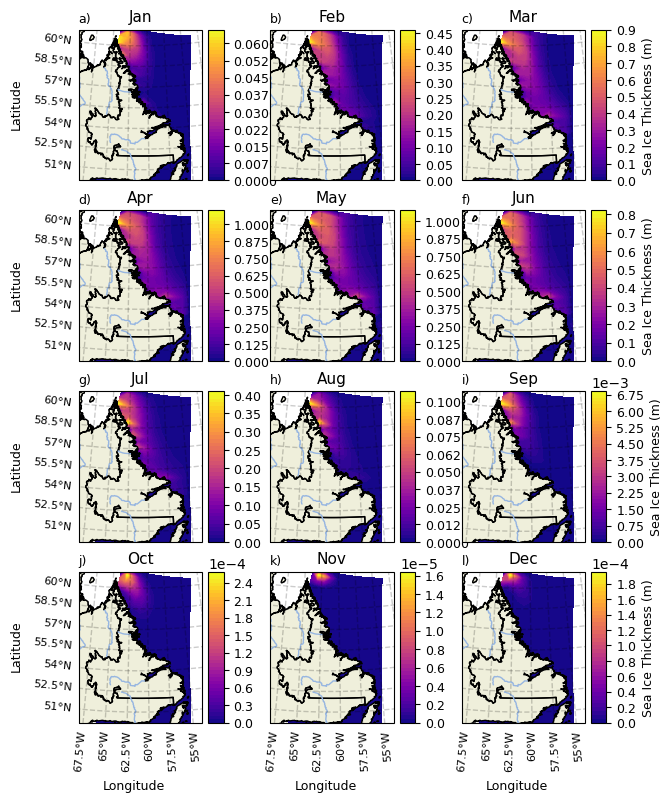

In [76]:
# Create a figure with two# Create a figure with two subplots
fig = plt.figure(figsize=(7,9))

selected_data= [hi_months[0], hi_months[1], hi_months[2], hi_months[3], hi_months[4], hi_months[5],
                hi_months[6], hi_months[7], hi_months[8], hi_months[9], hi_months[10], hi_months[11]]

titles = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
name=['a)','b)','c)','d)','e)','f)','g)','h)','i)','j)','k)','l)']


x0, x1, y0, y1 = -68,-54,50,61

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
#for i in range(3):
    # Create a subplot with the PlateCarree projection
    ax = plt.subplot(4,3, i+1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    ax.set_title(titles[i], fontsize=11)
    ax.coastlines(linewidth=0.5)
    ax.add_feature(cfeature.LAKES,  zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES,  zorder=2)
    ax.add_feature(cfeature.BORDERS,  zorder=2)
    #ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.RIVERS,  zorder=2)
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,name[i], transform=ax.transAxes, fontsize=9)
    
    
    contf=ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i],cmap='plasma',vmin=0,levels=45,
                   vmax=np.nanmax(selected_data[i].values),transform=ccrs.PlateCarree(), )
    gl = ax.gridlines(draw_labels=False, linewidth=1, color='black', alpha=0.2, linestyle='--',
                          transform=ccrs.PlateCarree())
    cbar=fig.colorbar(contf, ax=ax,aspect=10, pad=0.04,shrink=1 )
    cbar.ax.tick_params(labelsize=9)
    cb = cbar
    
    if i in [0,3,6]:
        gl.xlabels_bottom, gl.ylabels_left =  False, True
        gl.xlabels_top, gl.ylabels_right = False, False
        gl.xformatter = gridliner.LongitudeFormatter()
        gl.yformatter = gridliner.LatitudeFormatter()
        ax.text(-0.45, 0.51, 'latitude'.title(), va='bottom', ha='center', rotation='vertical',
                rotation_mode='anchor',fontsize=9, transform=ax.transAxes)
    
    if i in [2,5,8,11]:
        cbar.ax.set_ylabel('Sea Ice Thickness (m)', fontsize=9)
    if i in [8]:
        gl.xformatter = gridliner.LongitudeFormatter()
        gl.yformatter = gridliner.LatitudeFormatter()
        cb.formatter.set_powerlimits((0, 0))
        cb.ax.yaxis.set_offset_position('left')
        cb.update_ticks()
    if i in [9]:
        ax.text(0.45, -0.46, 'longitude'.title(), va='bottom', ha='center', rotation='horizontal',
            rotation_mode='anchor',fontsize=9, transform=ax.transAxes)
        ax.text(-0.45, 0.51, 'latitude'.title(), va='bottom', ha='center', rotation='vertical',
                rotation_mode='anchor',fontsize=9, transform=ax.transAxes)
        gl.xlabels_bottom, gl.ylabels_left =  True, True
        gl.xlabels_top, gl.ylabels_right = False, False
        gl.xformatter = gridliner.LongitudeFormatter()
        gl.yformatter = gridliner.LatitudeFormatter()
        cb.formatter.set_powerlimits((0, 0))
        cb.ax.yaxis.set_offset_position('left')
        cb.update_ticks()
    
        
    if i in [10,11]:
        ax.text(0.45, -0.46, 'longitude'.title(), va='bottom', ha='center', rotation='horizontal',
            rotation_mode='anchor',fontsize=9, transform=ax.transAxes)
        gl.xlabels_bottom, gl.ylabels_left =  True, False
        gl.xlabels_top, gl.ylabels_right = False, False
        gl.xformatter = gridliner.LongitudeFormatter()
        gl.yformatter = gridliner.LatitudeFormatter()
        cb.formatter.set_powerlimits((0, 0))
        cb.ax.yaxis.set_offset_position('left')
        cb.update_ticks()
        
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}

plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.2)
plt.savefig(path+'/plots/'+'plot8.jpg',dpi=300, bbox_inches='tight')
plt.show()

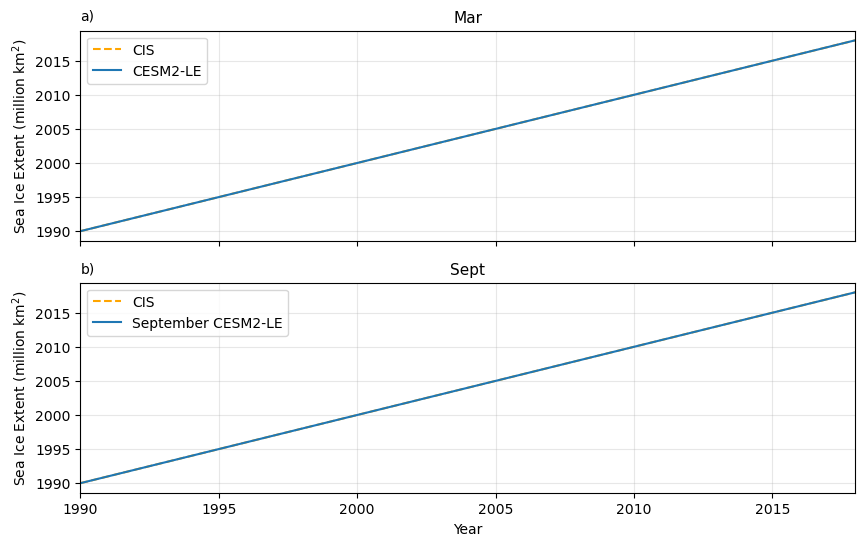

In [74]:

fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
years = np.arange(1990, 2019)
obs_total_march=np.arange(1990, 2019)
model_total_march=np.arange(1990, 2019)
obs_total_september=np.arange(1990, 2019)
model_total_september=np.arange(1990, 2019)
# First plot
ax[0].plot(years, obs_total_march, label='CIS', color='orange', linestyle='--')
ax[0].plot(years, model_total_march, label='CESM2-LE')
ax[0].set_ylabel('Sea Ice Extent (million km$^2$)')
ax[0].legend(loc='upper left')
ax[0].grid(alpha=0.3)

# Second plot
ax[1].plot(years, obs_total_september, label='CIS', color='orange', linestyle='--')
ax[1].plot(years, model_total_september, label='September CESM2-LE')
ax[1].set_ylabel('Sea Ice Extent (million km$^2$)')
ax[1].legend(loc='upper left')
ax[1].grid(alpha=0.3)
ax[1].set_xlabel('Year')

ax[0].text(0, 1.05, 'a)',transform=ax[0].transAxes, fontsize=10)
ax[1].text(0, 1.05, 'b)',transform=ax[1].transAxes, fontsize=10)
ax[0].set_title('Mar', fontsize=11)
ax[1].set_title('Sept', fontsize=11)
plt.xlim(1990,2018)
#plt.savefig('obs_model1.jpg', dpi=300, bbox_inches='tight')
plt.show()

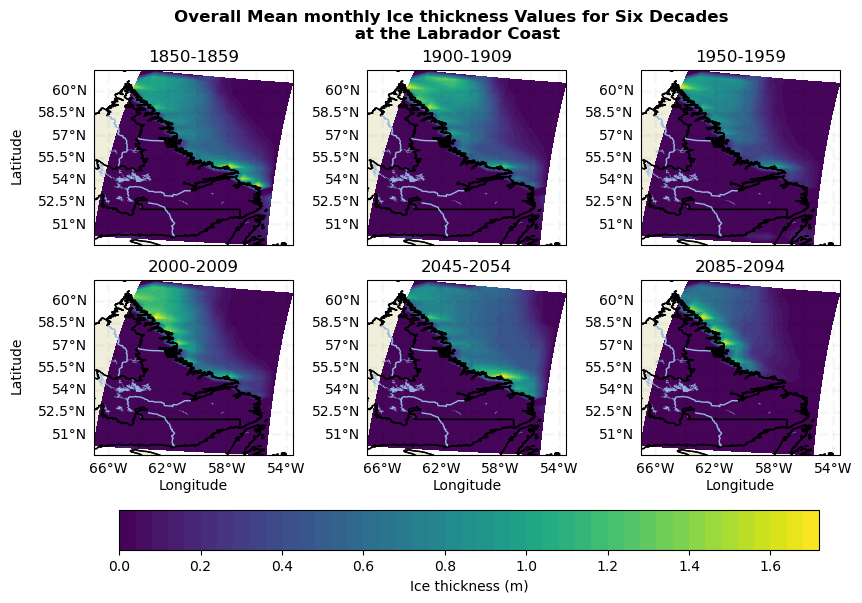

In [75]:

# Create a figure with two subplots
fig = plt.figure(figsize=(10, 5))
selected_data = [hi_1850_59, hi_1900_09, hi_1950_59, hi_2000_09, hi_2045_54, hi_2085_94]
titles=['1850-1859','1900-1909','1950-1959','2000-2009','2045-2054','2085-2094']
for i, v in enumerate(selected_data):
    # Create a subplot with the PlateCarree projection
    ax = plt.subplot(2,3, i+1, projection=ccrs.PlateCarree())
    cb=ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i].max('time'),
                   levels=45, transform=ccrs.PlateCarree())
    ax.set_title(titles[i])
    ax.coastlines()
    ax.add_feature(cfeature.LAKES)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.OCEAN, color='white')
    ax.add_feature(cfeature.RIVERS)
    
    #ax.set_extent([-65,-55,50,61])
    if i in [3,4,5]:
        ax.set_ylabel('Latitude')
        ax.set_xlabel('Longitude')
        gl = ax.gridlines(draw_labels=True, linewidth=2, color='black', alpha=0.03, linestyle='--',
                          transform=ccrs.PlateCarree())
        gl.xlabels_bottom, gl.ylabels_left = True, True
        gl.xlabels_top, gl.ylabels_right = False, False
        gl.xformatter = gridliner.LongitudeFormatter()
        gl.yformatter = gridliner.LatitudeFormatter()
        ax.text(0.5, -0.22, 'longitude'.title(), va='bottom', ha='center', rotation='horizontal',
            rotation_mode='anchor', transform=ax.transAxes)
    if i in [0,1,2]:
        gl = ax.gridlines(draw_labels=True, linewidth=2, color='black', alpha=0.03, linestyle='--',
                          crs=ccrs.PlateCarree())
        gl.xlabels_bottom, gl.ylabels_left =  False, True
        gl.xlabels_top, gl.ylabels_right = False, False
        gl.xformatter = gridliner.LongitudeFormatter()
        gl.yformatter = gridliner.LatitudeFormatter()
    if i in [0,3]:
        ax.text(-0.35, 0.51, 'latitude'.title(), va='bottom', ha='center', rotation='vertical',
                rotation_mode='anchor', transform=ax.transAxes)
cbar_ax = fig.add_axes([0.165, -0.08, 0.7, 0.08])
fig.colorbar(cb, cax=cbar_ax, orientation='horizontal',label='Ice thickness (m)')
plt.suptitle('Overall Mean monthly Ice thickness Values for Six Decades \n at the Labrador Coast',y=1,
             fontweight='bold')
#plt.savefig('spatial.jpg',dpi=300, bbox_inches='tight')
plt.show()


### Pan-Artic Domain

In [ ]:
# Define the Labrador coast boundaries (replace these with your desired region)
lat_minp, lat_maxp = 50, 90
lon_minp, lon_maxp =0, 360 

# Create a mask for Labrador coast 
mask = ((hi.TLAT >= lat_minp) & (hi.TLAT <= lat_maxp) &
        (hi.TLON >= lon_minp) & (hi.TLON <= lon_maxp))

# Apply the mask to the hi variable
hi_region_p = hi.where(mask, drop=True)
hi_region_p

In [ ]:
#Hist
hi_1850_59_p = hi_region_p.sel(time=slice('1850-02-01','1860-01-01'))
hi_1860_69_p = hi_region_p.sel(time=slice('1860-02-01','1870-01-01'))
hi_1870_79_p = hi_region_p.sel(time=slice('1870-02-01','1880-01-01'))
hi_1880_89_p = hi_region_p.sel(time=slice('1880-02-01','1890-01-01'))
hi_1890_99_p = hi_region_p.sel(time=slice('1890-02-01','1900-01-01'))
hi_1900_09_p = hi_region_p.sel(time=slice('1900-02-01','1910-01-01'))
hi_1910_19_p = hi_region_p.sel(time=slice('1910-02-01','1920-01-01'))
hi_1920_29_p = hi_region_p.sel(time=slice('1920-02-01','1930-01-01'))
hi_1930_39_p = hi_region_p.sel(time=slice('1930-02-01','1940-01-01'))
hi_1940_49_p = hi_region_p.sel(time=slice('1940-02-01','1950-01-01'))
hi_1950_59_p = hi_region_p.sel(time=slice('1950-02-01','1960-01-01'))
hi_1960_69_p = hi_region_p.sel(time=slice('1960-02-01','1970-01-01'))
hi_1970_79_p = hi_region_p.sel(time=slice('1970-02-01','1980-01-01'))
hi_1980_89_p = hi_region_p.sel(time=slice('1980-02-01','1990-01-01'))
hi_1990_99_p = hi_region_p.sel(time=slice('1990-02-01','2000-01-01'))
hi_2000_09_p = hi_region_p.sel(time=slice('2000-02-01','2010-01-01'))
hi_2010_14_p = hi_region_p.sel(time=slice('2010-02-01','2015-01-01'))
#Future
hi_2015_24_p = hi_region_p.sel(time=slice('2015-02-01','2025-01-01'))
hi_2025_34_p = hi_region_p.sel(time=slice('2025-02-01','2035-01-01'))
hi_2035_44_p = hi_region_p.sel(time=slice('2035-02-01','2045-01-01'))
hi_2045_54_p = hi_region_p.sel(time=slice('2045-02-01','2055-01-01'))
hi_2055_64_p = hi_region_p.sel(time=slice('2055-02-01','2065-01-01'))
hi_2065_74_p = hi_region_p.sel(time=slice('2065-02-01','2075-01-01'))
hi_2075_84_p = hi_region_p.sel(time=slice('2075-02-01','2085-01-01'))
hi_2085_94_p = hi_region_p.sel(time=slice('2085-02-01','2095-01-01'))
hi_2095_100_p = hi_region_p.sel(time=slice('2095-02-01','2101-01-01'))

In [ ]:
#monthly mean hist
hi_1850_59_monthly_p = hi_1850_59_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1860_69_monthly_p = hi_1860_69_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1870_79_monthly_p = hi_1870_79_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1880_89_monthly_p = hi_1880_89_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1890_99_monthly_p = hi_1890_99_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1900_09_monthly_p = hi_1900_09_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1910_19_monthly_p = hi_1910_19_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1920_29_monthly_p = hi_1920_29_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1930_39_monthly_p = hi_1930_39_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1940_49_monthly_p = hi_1940_49_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1950_59_monthly_p = hi_1950_59_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1960_69_monthly_p = hi_1960_69_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1970_79_monthly_p = hi_1970_79_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1980_89_monthly_p = hi_1980_89_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_1990_99_monthly_p = hi_1990_99_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_2000_09_monthly_p = hi_2000_09_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_2010_14_monthly_p = hi_2010_14_p.groupby('time.month').mean('time').mean(('nj','ni'))

#monthly mean future
hi_2015_24_monthly_p = hi_2015_24_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_2025_34_monthly_p = hi_2025_34_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_2035_44_monthly_p = hi_2035_44_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_2045_54_monthly_p = hi_2045_54_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_2055_64_monthly_p = hi_2055_64_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_2065_74_monthly_p = hi_2065_74_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_2075_84_monthly_p = hi_2075_84_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_2085_94_monthly_p = hi_2085_94_p.groupby('time.month').mean('time').mean(('nj','ni'))
hi_2095_100_monthly_p = hi_2095_100_p.groupby('time.month').mean('time').mean(('nj','ni'))

In [ ]:
# Set xticks to represent months from January to December
fig,ax=plt.subplots(figsize=(8,6))
all_data = [hi_1850_59_monthly_p, hi_1860_69_monthly_p, hi_1870_79_monthly_p, hi_1880_89_monthly_p,
            hi_1890_99_monthly_p, hi_1900_09_monthly_p, hi_1910_19_monthly_p, hi_1920_29_monthly_p,
            hi_1930_39_monthly_p, hi_1940_49_monthly_p, hi_1950_59_monthly_p, hi_1960_69_monthly_p,
            hi_1970_79_monthly_p, hi_1980_89_monthly_p, hi_1990_99_monthly_p, hi_2000_09_monthly_p,
            hi_2010_14_monthly_p, hi_2015_24_monthly_p, hi_2025_34_monthly_p, hi_2035_44_monthly_p,
            hi_2045_54_monthly_p, hi_2055_64_monthly_p, hi_2065_74_monthly_p, hi_2075_84_monthly_p,
            hi_2085_94_monthly_p, hi_2095_100_monthly_p]
        
labels = ['1850_1859', '1860_1869', '1870_1879', '1880_1889', '1890_1899', '1900_1909', '1910_1919',
          '1920_1929', '1930_1939', '1940_1949', '1950_1959', '1960_1969', '1970_1979', '1980_1989',
          '1990_1999', '2000_1909', '2010_2014', '2015_2024', '2025_2034', '2035_2044', '2045_2054',
          '2055_2064', '2065_2074', '2075_2084', '2085_2094', '2095_2100']


colors=plt.cm.tab20(np.linspace(0, 1, 26))

for i in range(len(all_data)):
    linestyle = '-'  # Default linestyle
    if labels[i] in ['2015_2024', '2025_2034', '2035_2044', '2045_2054', '2055_2064', '2065_2074',
                     '2075_2084', '2085_2094', '2095_2100']:
        linestyle = '--'  # Change linestyle for specific labels

    ax.plot(all_data[i], color=colors[i], linestyle=linestyle, label=labels[i])
plt.xticks(np.arange(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Months')
plt.ylabel('Ice thickness (m)')
#plt.title('Average Monthly SIC variation from 1850 to 2100', fontweight='bold')
plt.legend(loc='best',fontsize='small', bbox_to_anchor=(1.2, 1.05))
plt.grid(alpha=0.1)
# Get handles and labels for the lines
#handles, labels = plt.gca().get_legend_handles_labels()

# Create two legends
#legend1=plt.legend(handles[:13],labels[:13],loc='lower left',bbox_to_anchor=(0.12, 0),frameon=False,fontsize='small')
#legend2=plt.legend(handles[13:],labels[13:],loc='lower left',bbox_to_anchor=(0.3, 0),frameon=False,fontsize='small')

# Add the first legend manually to the current Axes
#plt.gca().add_artist(legend1)

plt.show()

#panarctic 

In [ ]:
fig, ax=plt.subplots()
# Compute the yearly mean ice area
yearly_mean_p = hi_region_p.mean(('nj', 'ni')).groupby('time.year').mean('time')

# Calculate the mean across all years
overall_mean_p = yearly_mean_p.mean('year')
# Create an array with the same size as the number of years with the overall mean value
mean_line_p = np.full_like(yearly_mean_p, overall_mean_p)
# Plot the yearly variations and the mean line
ax.plot(yearly_mean_p.year, yearly_mean_p, label='Yearly Variations')
#plt.plot(yearly_mean.year, mean_line, label='Mean Variation', linestyle='--')
#.plot(yearly_mean_p.year, yearly_mean_p.rolling(year=10, center=True).mean()*100, label='Smoothed Yearly Variations')
plt.xlabel('Year')
plt.ylabel('Ice thickness(m)')
plt.legend()
plt.show()

In [ ]:
#=================mean=========================
# Create a figure with two subplots
fig = plt.figure(figsize=(12, 7))
#selected_data=[aice_1850_59_p, aice_1900_09_p, aice_1950_59_p, aice_2000_09_p, aice_2045_54_p, aice_2085_94_p]
#titles=['1850-1859','1900-1909','1950-1959','2000-2009','2045-2054','2085-2094']
selected_data = [hi_1850_59_p, hi_1860_69_p, hi_1870_79_p, hi_1880_89_p, hi_1890_99_p,
                hi_1900_09_p, hi_1910_19_p, hi_1920_29_p, hi_1930_39_p, hi_1940_49_p,
                hi_1950_59_p, hi_1960_69_p, hi_1970_79_p, hi_1980_89_p, hi_1990_99_p,
                hi_2000_09_p, hi_2010_14_p, hi_2015_24_p, hi_2025_34_p, hi_2035_44_p,
                hi_2045_54_p, hi_2055_64_p, hi_2065_74_p, hi_2075_84_p, hi_2085_94_p,
                hi_2095_100_p]

titles = ['1850-1859', '1860-1869', '1870-1879', '1880-1889', '1890-1899', '1900-1909', '1910-1919',
          '1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989',
          '1990-1999', '2000-1909', '2010-2014', '2015-2024', '2025-2034', '2035-2044', '2045-2054',
          '2055-2064', '2065-2074', '2075-2084', '2085-2094', '2095-2100']


theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
for i, v in enumerate(selected_data): 
    # Create a subplot with the PlateCarree projection
    ax = plt.subplot(4,7, i+1, projection=ccrs.NorthPolarStereo())
    cb=ax.scatter(selected_data[i].TLON,selected_data[i].TLAT,c=selected_data[i].mean('time'),s=1,marker='s',
                   transform=ccrs.PlateCarree(), vmin=0, vmax=4)
    ax.set_title(titles[i])
    ax.coastlines(linewidth=0.5)
    #ax.add_feature(cfeature.LAKES)
    ax.add_feature(cfeature.LAND)
    #ax.add_feature(cfeature.STATES)
    #ax.add_feature(cfeature.BORDERS)
    #ax.add_feature(cfeature.OCEAN)
    #ax.add_feature(cfeature.RIVERS)
    ax.set_extent([0, 360,50, 90], ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='black', alpha=0.2, linestyle='--', 
                      transform=ccrs.PlateCarree())
    gl.xformatter = gridliner.LongitudeFormatter()
    gl.yformatter = gridliner.LatitudeFormatter()
    ax.set_boundary(circle, transform=ax.transAxes)
    
cbar_ax = fig.add_axes([0.14, 0.04, 0.75, 0.05])
fig.colorbar(cb, cax=cbar_ax, orientation='horizontal', label='Ice thickness (m)')
plt.suptitle('Time average of Ice thickness over Pan-Artic region (Esemble 1001-001)',y=1, fontweight='bold') 
#plt.savefig('sample.jpg',dpi=300, bbox_inches='tight')
#plt.subplots_adjust(wspace=-0.3)

plt.show()

In [ ]:
#=================mean=========================
# Create a figure with two subplots
fig = plt.figure(figsize=(12, 7))
#selected_data=[aice_1850_59_p, aice_1900_09_p, aice_1950_59_p, aice_2000_09_p, aice_2045_54_p, aice_2085_94_p]
#titles=['1850-1859','1900-1909','1950-1959','2000-2009','2045-2054','2085-2094']
selected_data= [hi_2045_54_p, hi_2055_64_p]

titles = ['2045-2054','2055-2064']


theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
for i, v in enumerate(selected_data): 
    # Create a subplot with the PlateCarree projection
    ax = plt.subplot(1,2, i+1, projection=ccrs.NorthPolarStereo())
    cb=ax.scatter(selected_data[i].TLON,selected_data[i].TLAT,c=selected_data[i].mean('time'),s=20,marker='s',
                   transform=ccrs.PlateCarree(), vmin=0, vmax=4)
    ax.set_title(titles[i])
    ax.coastlines(linewidth=0.5)
    #ax.add_feature(cfeature.LAKES)
    ax.add_feature(cfeature.LAND)
    #ax.add_feature(cfeature.STATES)
    #ax.add_feature(cfeature.BORDERS)
    #ax.add_feature(cfeature.OCEAN)
    #ax.add_feature(cfeature.RIVERS)
    ax.set_extent([0, 360,50, 90], ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='black', alpha=0.2, linestyle='--', 
                      transform=ccrs.PlateCarree())
    gl.xformatter = gridliner.LongitudeFormatter()
    gl.yformatter = gridliner.LatitudeFormatter()
    ax.set_boundary(circle, transform=ax.transAxes)
    
cbar_ax = fig.add_axes([0.14, 0.04, 0.75, 0.05])
fig.colorbar(cb, cax=cbar_ax, orientation='horizontal', label='Ice thickness (m)')
plt.suptitle('Time average of Ice thickness over Pan-Artic region (Esemble 1001-001)',y=0.87, fontweight='bold') 
plt.savefig('2045-2064_icethick.jpg',dpi=300, bbox_inches='tight')
#plt.subplots_adjust(wspace=-0.3)

plt.show()

In [ ]:
hi_2050_p=hi_region_p.sel(time=slice('2050-01','2050-12'))
hi_2050_p

In [ ]:
#=================mean=========================
# Create a figure with two subplots
fig = plt.figure(figsize=(10, 5))
#selected_data=[aice_1850_59_p, aice_1900_09_p, aice_1950_59_p, aice_2000_09_p, aice_2045_54_p, aice_2085_94_p]
#titles=['1850-1859','1900-1909','1950-1959','2000-2009','2045-2054','2085-2094']
selected_data= [hi_2050_p]

titles = [2050]

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
for i, v in enumerate(selected_data): 
    # Create a subplot with the PlateCarree projection
    ax = plt.subplot(1,1, i+1, projection=ccrs.NorthPolarStereo())
    cb=ax.scatter(selected_data[i].TLON,selected_data[i].TLAT,c=selected_data[i].mean('time'),s=20,marker='s',
                   transform=ccrs.PlateCarree(), vmin=0, vmax=4)
    ax.set_title(titles[i])
    ax.coastlines(linewidth=0.5)
    #ax.add_feature(cfeature.LAKES)
    ax.add_feature(cfeature.LAND)
    #ax.add_feature(cfeature.STATES)
    #ax.add_feature(cfeature.BORDERS)
    #ax.add_feature(cfeature.OCEAN)
    #ax.add_feature(cfeature.RIVERS)
    ax.set_extent([0, 360,50, 90], ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='black', alpha=0.2, linestyle='--', 
                      transform=ccrs.PlateCarree())
    gl.xformatter = gridliner.LongitudeFormatter()
    gl.yformatter = gridliner.LatitudeFormatter()
    ax.set_boundary(circle, transform=ax.transAxes)
    plt.colorbar(cb)
    
#cbar_ax = fig.add_axes([0.14, 0.04, 0.75, 0.05])
#fig.colorbar(cb, cax=cbar_ax, orientation='vertical', label='SIC (%)')
plt.suptitle('Time average of Ice thickness over Pan-Artic region\n(Esemble 1001-001)',x=0.57, y=1,fontweight='bold') 
#plt.colorbar(cb,label='$SiO_3$($mmol$ $m^{-3}$)', shrink=0.65)
#plt.savefig('sample_3.jpg',dpi=300, bbox_inches='tight')
#plt.subplots_adjust(wspace=-0.3)

plt.show()

In [ ]:
hi_2050_sept=hi_region_p.sel(time='2050-09-01')
hi_2050_sept

In [ ]:
#=================mean=========================
# Create a figure with two subplots
fig = plt.figure(figsize=(10, 5))
selected_data=[hi_2050_sept]
#titles=['1850-1859','1900-1909','1950-1959','2000-2009','2045-2054','2085-2094']

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
for i, v in enumerate(selected_data): 
    # Create a subplot with the PlateCarree projection
    ax = plt.subplot(1,1, i+1, projection=ccrs.NorthPolarStereo())
    cb=ax.scatter(hi_2050_sept.TLON,hi_2050_sept.TLAT,c=hi_2050_sept,s=20,marker='s',
                   transform=ccrs.PlateCarree(),vmax=4)
    ax.set_title('Semptember 2050 Ice thickness over Pan-Arctic region\n(Esemble 1001-001)',fontweight='bold')
    ax.coastlines(linewidth=0.5)
    #ax.add_feature(cfeature.LAKES)
    ax.add_feature(cfeature.LAND)
    #ax.add_feature(cfeature.STATES)
    #ax.add_feature(cfeature.BORDERS)
    #ax.add_feature(cfeature.OCEAN)
    #ax.add_feature(cfeature.RIVERS)
    ax.set_extent([0, 360,50, 90], ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='black', alpha=0.2, linestyle='--', 
                      transform=ccrs.PlateCarree())
    gl.xformatter = gridliner.LongitudeFormatter()
    gl.yformatter = gridliner.LatitudeFormatter()
    ax.set_boundary(circle, transform=ax.transAxes)
    plt.colorbar(cb)
    
#cbar_ax = fig.add_axes([0.14, 0.04, 0.75, 0.05])
#fig.colorbar(cb, cax=cbar_ax, orientation='vertical', label='SIC (%)')
#plt.suptitle('Semptember 2050 Ice thickness over Pan-Artic region\n(Esemble 1001-001)',
#x=0.57, y=1,fontweight='bold') 
#plt.colorbar(cb,label='$SiO_3$($mmol$ $m^{-3}$)', shrink=0.65)
plt.savefig('2050sept_icethick.jpg',dpi=300, bbox_inches='tight')
#plt.subplots_adjust(wspace=-0.3)

plt.show()

#### 2045, 2050, 2055 september ice thickness

In [ ]:
#2045-2050-2055
hi_2045_sept=hi_region_p.sel(time='2045-09-01')
hi_2050_sept=hi_region_p.sel(time='2050-09-01')
hi_2055_sept=hi_region_p.sel(time='2055-09-01')

In [ ]:
#=================mean=========================
# Create a figure with two subplots
fig = plt.figure(figsize=(10, 5))
selected_data=[hi_2045_sept, hi_2050_sept, hi_2055_sept]
titles=['2045','2050','2055']

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
for i, v in enumerate(selected_data): 
    # Create a subplot with the PlateCarree projection
    ax = plt.subplot(1,3, i+1, projection=ccrs.NorthPolarStereo())
    cb=ax.scatter(selected_data[i].TLON,selected_data[i].TLAT,c=selected_data[i].groupby('time.year').mean('time').
                  mean('year'),s=20,marker='s', transform=ccrs.PlateCarree(),vmax=4)
    ax.set_title(titles[i])
    ax.coastlines(linewidth=0.5)
    #ax.add_feature(cfeature.LAKES)
    ax.add_feature(cfeature.LAND)
    #ax.add_feature(cfeature.STATES)
    #ax.add_feature(cfeature.BORDERS)
    #ax.add_feature(cfeature.OCEAN)
    #ax.add_feature(cfeature.RIVERS)
    ax.set_extent([0, 360,50, 90], ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='black', alpha=0.2, linestyle='--', 
                      transform=ccrs.PlateCarree())
    gl.xformatter = gridliner.LongitudeFormatter()
    gl.yformatter = gridliner.LatitudeFormatter()
    ax.set_boundary(circle, transform=ax.transAxes)
    #plt.colorbar(cb)
    
cbar_ax = fig.add_axes([0.14, 0.18, 0.75, 0.05])
fig.colorbar(cb, cax=cbar_ax, orientation='horizontal', label='Ice thickness (m)')
plt.suptitle('September ice thickness (EM 1001-001)',y=0.85, fontweight='bold') 
#plt.savefig('2045-2064_icethick.jpg',dpi=300, bbox_inches='tight')
plt.savefig('sept_icethickness.jpg',dpi=300, bbox_inches='tight')
#plt.subplots_adjust(wspace=-0.3)

plt.show()

#### Decadal mean for september (2045-2055) ice thickness

In [ ]:
hi_2045_55_sept=hi_region_p.sel(time=slice('2045', '2055'))[8::12]
#hi_2045_55_sept

In [ ]:
#=================mean=========================
fig = plt.figure(figsize=(7, 5))

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax = plt.subplot(1,1,1, projection=ccrs.NorthPolarStereo())
cb=ax.scatter(hi_2045_55_sept.TLON, hi_2045_55_sept.TLAT, c=hi_2045_55_sept.mean('time'),
              s=20,marker='s',transform=ccrs.PlateCarree(), vmax=2)
ax.set_title('2045-2055 September Ice Thickness \n (EM 1001-001)', fontweight='bold')
ax.coastlines(linewidth=1)
#ax.add_feature(cfeature.BORDERS, zorder=6)
ax.add_feature(cfeature.LAND, zorder=6)
ax.set_extent([0, 360,50, 90], ccrs.PlateCarree())

gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='black', alpha=0.4, linestyle='--',
                  transform=ccrs.PlateCarree(),zorder=14)
gl.xformatter = gridliner.LongitudeFormatter()
gl.yformatter = gridliner.LatitudeFormatter()
ax.set_boundary(circle, transform=ax.transAxes)
plt.colorbar(cb, label='Ice Thickness (m)')
plt.savefig('2045-2055sept_icethickness.jpg',dpi=300, bbox_inches='tight')

plt.show()

#### Decadal mean for september (2090 - 2100) ice thickness

In [ ]:
hi_2090_2100_sept=hi_region_p.sel(time=slice('2090', '2100'))[8::12]
#hi_2090_2100_sept

In [ ]:
#=================mean=========================
fig = plt.figure(figsize=(7, 5))

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax = plt.subplot(1,1,1, projection=ccrs.NorthPolarStereo())
cb=ax.scatter(hi_2090_2100_sept.TLON, hi_2090_2100_sept.TLAT, c=hi_2090_2100_sept.mean('time'),
              s=20,marker='s',transform=ccrs.PlateCarree(), vmax=1)
ax.set_title('2090-2100 September Ice Thickness \n (EM 1001-001)', fontweight='bold')
ax.coastlines(linewidth=1)
#ax.add_feature(cfeature.BORDERS, zorder=6)
ax.add_feature(cfeature.LAND, zorder=6)
ax.set_extent([0, 360,50, 90], ccrs.PlateCarree())

gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='black', alpha=0.4, linestyle='--',
                  transform=ccrs.PlateCarree(),zorder=14)
gl.xformatter = gridliner.LongitudeFormatter()
gl.yformatter = gridliner.LatitudeFormatter()
ax.set_boundary(circle, transform=ax.transAxes)
plt.colorbar(cb, label='Ice Thickness (m)')
plt.savefig('2090-2100sept_icethickness.jpg',dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
hi_2000_2010_p=hi_region_p.sel(time=slice('2000', '2010'))

In [ ]:
#=================mean=========================
fig = plt.figure(figsize=(7, 5))

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax = plt.subplot(1,1,1, projection=ccrs.NorthPolarStereo())
cb=ax.scatter(hi_2000_2010_p.TLON, hi_2000_2010_p.TLAT, c=hi_2000_2010_p.mean('time'),
              s=20,marker='s',vmin=0, vmax=4, transform=ccrs.PlateCarree())
ax.set_title('2000-2010 Mean Ice Thickness \n (EM 1001-001)', fontweight='bold')
ax.coastlines(linewidth=1)
#ax.add_feature(cfeature.BORDERS, zorder=6)
ax.add_feature(cfeature.LAND, zorder=6)
ax.set_extent([0, 360,50, 90], ccrs.PlateCarree())

gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='black', alpha=0.4, linestyle='--',
                  transform=ccrs.PlateCarree(),zorder=14)
gl.xformatter = gridliner.LongitudeFormatter()
gl.yformatter = gridliner.LatitudeFormatter()
ax.set_boundary(circle, transform=ax.transAxes)
plt.colorbar(cb, label='Ice Thickness (m)')
plt.savefig('2000-2010_icethickness.jpg',dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Define your colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'maroon', 
          'purple', 'pink', 'brown', 'orange', 'teal', 'coral', 'navy', 'turquoise', 
          'lime', 'gold', 'indigo', 'violet', 'olive', 'peachpuff', 'lightblue', 
          'darkgreen', 'salmon', 'beige', 'skyblue', 'plum', 'darkred']

# Define a corresponding list of color names
color_names = ['Blue', 'Green', 'Red', 'Cyan', 'Magenta', 'Yellow', 'Black', 'Maroon', 
               'Purple', 'Pink', 'Brown', 'Orange', 'Teal', 'Coral', 'Navy', 'Turquoise', 
               'Lime', 'Gold', 'Indigo', 'Violet', 'Olive', 'Peachpuff', 'Light Blue', 
               'Dark Green', 'Salmon', 'Beige', ]

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Generate a bar chart
bars = plt.barh(color_names, [1]*29, color=colors)

# Remove x-axis
plt.gca().axes.get_xaxis().set_visible(False)

# Title
plt.title('Color Palette')

# Show the plot
plt.show()


In [29]:
np.arange(1850,2101,10)

array([1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950,
       1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030, 2040, 2050, 2060,
       2070, 2080, 2090, 2100])